### Data Preprocessing for C-3BO

In [1]:
#data management imports
import os
import glob

#preprocessing/augmentation
import numpy as np
import cv2
import imutils #maybe won't use
import PIL
from PIL import Image, ImageFilter

#visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#other useful libraries
import tqdm

In [1]:
pwd

'C:\\Users\\leode\\isef_2022-23'

In [2]:
dataDir = "C:\\Users\\leode\\Blood-Cancer_Data"

class Dataset:
    def __init__(self, mainDir,):
        assert os.dir.exists(dataDir) and len(os.listdir(mainDir)) > 2
        self.mainDir = mainDir
        self.curr = mainDir[0]
    def changeCurr(to): self.curr = mainDir[to]
    def information(self, sort=False):
        return ''
    #compares datasets based on criteria
    def visualize(self, how='bar'):
        pass
    def __new__(cls, *args, **kwargs):
        if cls._instance is None:
            cls._instance = cls(*args, **kwargs)
        return cls._instance
    


In [3]:
datasets = list()

#every root we will be ignoring right now
ignore = [
    "acute_myeloid_leukemia",
    "ALL_IDB2",
    "SN-AM-BALL-MM",
    "genetic_data",
    "chronic_myeloid_leukemia"
]
inIgnore = lambda path: sum([i in path for i in ignore]) > 0
nonTypes = set({'.rar', '.txt', '.xyc'})

for (root, dirs, files) in os.walk(dataDir, topdown=True):
    if inIgnore(root) or root==dataDir: continue
    if len(files)>0 and files[0][-4:] in nonTypes: continue
    datasets.append(root)
    print(root)

C:\Users\leode\Blood-Cancer_Data\ALL_IDB1\im
C:\Users\leode\Blood-Cancer_Data\ALL_Tehran
C:\Users\leode\Blood-Cancer_Data\Healthy-Cells
C:\Users\leode\Blood-Cancer_Data\Healthy-Cells\Platelets
C:\Users\leode\Blood-Cancer_Data\multiple_myeloma
C:\Users\leode\Blood-Cancer_Data\Parent
C:\Users\leode\Blood-Cancer_Data\Preprocessed


<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________
.png is not supported
________________________________________________________________________________________________________________________
<class 'numpy.ndarray'>
________________________________________________________________________________________________________________________


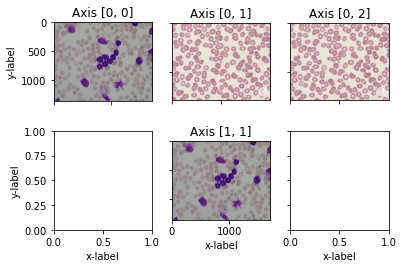

In [4]:
fig, axs = plt.subplots(2, 3)

#visualize the images
r = 0
c = 0
for D in datasets:
    images = glob.glob(f"{D}/*")
    if len(images)==0: continue
    try:
        img = mpimg.imread(images[0])
        print(type(img))
        axs[r, c].imshow(img)
        axs[r, c].set_title(f"Axis {[r, c]}")
        #imgplot = plt.imshow(img)
        #plt.show()
    except SyntaxError: print(f"{images[0][-4:]} is not supported")
    except Exception as e: print(type(e))
    finally:
        if (c==2):
            c = 0
            r += 1
        else: c += 1
        print('_'*120)
    
for ax in axs.flat: ax.set(xlabel='x-label', ylabel='y-label')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

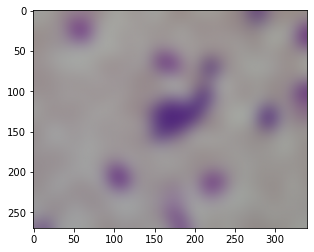

In [151]:
# sample1 = Preprocessed(y, 4)
# sample1.selectByScript(script)
plt.imshow(x)

In [157]:
#do this with preprocessing!

class Preprocessed:
    def __init__(self, img, numVar: int):
        self.img = img.resize((270, 340))
        self.numVar = numVar #just for easy object access
        self.variations = np.ones((numVar, 270, 340, 3))
        self.used = 0 #number of techniques used so far
    def blur(self, method="Gaussian"):
        blurredImg = self.img.resize((340, 270)).filter(ImageFilter.GaussianBlur(radius=10))
        self.variations[self.used] = blurredImg
        #print("Blurred the image!")
    def rotate(self, angle):
        rotatedImg = self.img.rotate(90, PIL.Image.NEAREST, expand=1)
        self.variations[self.used] = rotatedImg
        #print("Rotated the image!")
    def flip(self, method="..."):
        flippedImg = self.img.transpose(Image.FLIP_TOP_BOTTOM)
        self.variation[self.used] = flippedImg
        #print("Flipped the image!")
    def KERNEL(self, *args, **kwargs):
        pass
    def customTransformation(self, *args, **kwargs):
        pass
    def selectByScript(self, script):
        for M in script.keys():
            for argument in script.values():
                if M==1: self.blur(argument)
                elif M==2: self.rotate(argument)
                elif M==3: self.flip(argument)
                elif M==4: self.KERNEL(*argument)
                else: customTransformation()
                self.used += 1
    #recheck this dunder method        
    #def __call__(self): self.used += 1
    def __str__(self):
        print("size of image:", self.img.size)
        print("...")
        print("number of variations for augmentation", self.variations.shape[0])
        return ""
    def __del__(self):
        #probably necessary since many objects will be made
        return

preprocessedData = list()
script = {
    1: ["Gaussian", "Gaussian"],
    2: [10, 20],
}


In [154]:
plt.imsave

<function matplotlib.pyplot.imsave(fname, arr, **kwargs)>

In [161]:
counter = 0
for D in datasets:
    for path in tqdm.tqdm(glob.glob(f"{D}/*")):
        try:
            img = Image.open(path)  
            #img.save(f"{dataDir}\\Parent\\{counter}_cls.jpg")
            modifiedImg = Preprocessed(img, 4)
            modifiedImg.selectByScript(script)
            for idx in range(modifiedImg.numVar):
                plt.imsave(f"{dataDir}\\Preprocessed\\a.jpg", modifiedImg.variations[idx]/255.)
            del(modifiedImg)
            counter += 1
        except IOError:
            pass

  2%|█▌                                                                                | 2/108 [00:00<00:12,  8.24it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  4%|███                                                                               | 4/108 [00:00<00:12,  8.12it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  6%|████▌                                                                             | 6/108 [00:00<00:12,  8.19it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  6%|█████▎                                                                            | 7/108 [00:00<00:12,  8.04it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  8%|██████▊                                                                           | 9/108 [00:01<00:13,  7.21it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 10%|████████▎                                                                        | 11/108 [00:01<00:13,  7.04it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 13%|██████████▌                                                                      | 14/108 [00:01<00:12,  7.51it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 14%|███████████▎                                                                     | 15/108 [00:01<00:12,  7.70it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 17%|█████████████▌                                                                   | 18/108 [00:02<00:12,  7.26it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 18%|██████████████▎                                                                  | 19/108 [00:02<00:12,  7.25it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 19%|███████████████▊                                                                 | 21/108 [00:02<00:12,  7.18it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 22%|██████████████████                                                               | 24/108 [00:03<00:10,  7.67it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 24%|███████████████████▌                                                             | 26/108 [00:03<00:10,  7.92it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 26%|█████████████████████                                                            | 28/108 [00:03<00:10,  7.59it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 28%|██████████████████████▌                                                          | 30/108 [00:03<00:10,  7.62it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 29%|███████████████████████▎                                                         | 31/108 [00:04<00:10,  7.48it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 31%|████████████████████████▊                                                        | 33/108 [00:04<00:10,  7.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 31%|█████████████████████████▌                                                       | 34/108 [00:04<00:11,  6.29it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 32%|██████████████████████████▎                                                      | 35/108 [00:04<00:13,  5.39it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 33%|███████████████████████████                                                      | 36/108 [00:05<00:14,  5.06it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 35%|████████████████████████████▌                                                    | 38/108 [00:05<00:13,  5.38it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 36%|█████████████████████████████▎                                                   | 39/108 [00:05<00:14,  4.92it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 37%|██████████████████████████████                                                   | 40/108 [00:05<00:14,  4.70it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 38%|██████████████████████████████▊                                                  | 41/108 [00:06<00:14,  4.56it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 39%|███████████████████████████████▌                                                 | 42/108 [00:06<00:15,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 40%|████████████████████████████████▎                                                | 43/108 [00:06<00:15,  4.22it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 41%|█████████████████████████████████                                                | 44/108 [00:06<00:15,  4.16it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 42%|█████████████████████████████████▊                                               | 45/108 [00:07<00:14,  4.27it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 43%|██████████████████████████████████▌                                              | 46/108 [00:07<00:14,  4.27it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 44%|███████████████████████████████████▎                                             | 47/108 [00:07<00:14,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 44%|████████████████████████████████████                                             | 48/108 [00:07<00:13,  4.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 45%|████████████████████████████████████▊                                            | 49/108 [00:08<00:13,  4.35it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 46%|█████████████████████████████████████▌                                           | 50/108 [00:08<00:13,  4.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 47%|██████████████████████████████████████▎                                          | 51/108 [00:08<00:13,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 48%|███████████████████████████████████████                                          | 52/108 [00:08<00:12,  4.40it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 49%|███████████████████████████████████████▊                                         | 53/108 [00:08<00:12,  4.49it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 50%|████████████████████████████████████████▌                                        | 54/108 [00:09<00:11,  4.56it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 51%|█████████████████████████████████████████▎                                       | 55/108 [00:09<00:11,  4.43it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 52%|██████████████████████████████████████████                                       | 56/108 [00:09<00:11,  4.43it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 53%|██████████████████████████████████████████▊                                      | 57/108 [00:09<00:11,  4.40it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 54%|███████████████████████████████████████████▌                                     | 58/108 [00:10<00:11,  4.41it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 55%|████████████████████████████████████████████▎                                    | 59/108 [00:10<00:11,  4.41it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 56%|█████████████████████████████████████████████                                    | 60/108 [00:10<00:11,  4.32it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 56%|█████████████████████████████████████████████▋                                   | 61/108 [00:10<00:10,  4.40it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 57%|██████████████████████████████████████████████▌                                  | 62/108 [00:10<00:10,  4.39it/s]


Blurred the image!
Rotated the image!
Rotated the image!


 58%|███████████████████████████████████████████████▎                                 | 63/108 [00:11<00:10,  4.31it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 59%|████████████████████████████████████████████████                                 | 64/108 [00:11<00:10,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 60%|████████████████████████████████████████████████▊                                | 65/108 [00:11<00:09,  4.31it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 61%|█████████████████████████████████████████████████▌                               | 66/108 [00:11<00:09,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 62%|██████████████████████████████████████████████████▎                              | 67/108 [00:12<00:09,  4.27it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 63%|███████████████████████████████████████████████████                              | 68/108 [00:12<00:09,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 64%|███████████████████████████████████████████████████▋                             | 69/108 [00:12<00:09,  4.29it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 65%|████████████████████████████████████████████████████▌                            | 70/108 [00:12<00:08,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 66%|█████████████████████████████████████████████████████▎                           | 71/108 [00:13<00:08,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 67%|██████████████████████████████████████████████████████                           | 72/108 [00:13<00:08,  4.36it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 68%|██████████████████████████████████████████████████████▊                          | 73/108 [00:13<00:08,  4.36it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 69%|███████████████████████████████████████████████████████▌                         | 74/108 [00:13<00:07,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 69%|████████████████████████████████████████████████████████▎                        | 75/108 [00:13<00:07,  4.31it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 70%|█████████████████████████████████████████████████████████                        | 76/108 [00:14<00:07,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 71%|█████████████████████████████████████████████████████████▋                       | 77/108 [00:14<00:07,  4.34it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 72%|██████████████████████████████████████████████████████████▌                      | 78/108 [00:14<00:06,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 73%|███████████████████████████████████████████████████████████▎                     | 79/108 [00:14<00:06,  4.31it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 74%|████████████████████████████████████████████████████████████                     | 80/108 [00:15<00:06,  4.34it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 75%|████████████████████████████████████████████████████████████▊                    | 81/108 [00:15<00:06,  4.32it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 76%|█████████████████████████████████████████████████████████████▌                   | 82/108 [00:15<00:06,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 77%|██████████████████████████████████████████████████████████████▎                  | 83/108 [00:15<00:05,  4.32it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 78%|███████████████████████████████████████████████████████████████                  | 84/108 [00:16<00:05,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 79%|███████████████████████████████████████████████████████████████▊                 | 85/108 [00:16<00:05,  4.26it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 80%|████████████████████████████████████████████████████████████████▌                | 86/108 [00:16<00:05,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 81%|█████████████████████████████████████████████████████████████████▎               | 87/108 [00:16<00:04,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 81%|██████████████████████████████████████████████████████████████████               | 88/108 [00:17<00:04,  4.26it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 82%|██████████████████████████████████████████████████████████████████▊              | 89/108 [00:17<00:04,  4.27it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 83%|███████████████████████████████████████████████████████████████████▌             | 90/108 [00:17<00:04,  4.25it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 84%|████████████████████████████████████████████████████████████████████▎            | 91/108 [00:17<00:04,  4.24it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 85%|█████████████████████████████████████████████████████████████████████            | 92/108 [00:17<00:03,  4.18it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 86%|█████████████████████████████████████████████████████████████████████▊           | 93/108 [00:18<00:03,  4.20it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 87%|██████████████████████████████████████████████████████████████████████▌          | 94/108 [00:18<00:03,  4.31it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 88%|███████████████████████████████████████████████████████████████████████▎         | 95/108 [00:18<00:02,  4.40it/s]


Blurred the image!
Rotated the image!
Rotated the image!


 89%|████████████████████████████████████████████████████████████████████████         | 96/108 [00:18<00:02,  4.39it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 90%|████████████████████████████████████████████████████████████████████████▊        | 97/108 [00:19<00:02,  4.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 91%|█████████████████████████████████████████████████████████████████████████▌       | 98/108 [00:19<00:02,  4.34it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 92%|██████████████████████████████████████████████████████████████████████████▎      | 99/108 [00:19<00:02,  4.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 93%|██████████████████████████████████████████████████████████████████████████      | 100/108 [00:19<00:01,  4.32it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 94%|██████████████████████████████████████████████████████████████████████████▊     | 101/108 [00:20<00:01,  4.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 94%|███████████████████████████████████████████████████████████████████████████▌    | 102/108 [00:20<00:01,  4.29it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 95%|████████████████████████████████████████████████████████████████████████████▎   | 103/108 [00:20<00:01,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 96%|█████████████████████████████████████████████████████████████████████████████   | 104/108 [00:20<00:00,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 105/108 [00:20<00:00,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 106/108 [00:21<00:00,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 99%|███████████████████████████████████████████████████████████████████████████████▎| 107/108 [00:21<00:00,  4.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:21<00:00,  4.99it/s]
0it [00:00, ?it/s]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

  0%|                                                                                           | 0/86 [00:00<?, ?it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  2%|█▉                                                                                 | 2/86 [00:00<00:12,  6.52it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  5%|███▊                                                                               | 4/86 [00:00<00:13,  6.28it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  8%|██████▊                                                                            | 7/86 [00:01<00:12,  6.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  9%|███████▋                                                                           | 8/86 [00:01<00:12,  6.42it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 12%|█████████▌                                                                        | 10/86 [00:01<00:11,  6.45it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 15%|████████████▍                                                                     | 13/86 [00:02<00:11,  6.38it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 16%|█████████████▎                                                                    | 14/86 [00:02<00:11,  6.38it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 19%|███████████████▎                                                                  | 16/86 [00:02<00:11,  6.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 21%|█████████████████▏                                                                | 18/86 [00:02<00:10,  6.34it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 23%|███████████████████                                                               | 20/86 [00:03<00:10,  6.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 26%|████████████████████▉                                                             | 22/86 [00:03<00:10,  6.35it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 28%|██████████████████████▉                                                           | 24/86 [00:03<00:09,  6.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 30%|████████████████████████▊                                                         | 26/86 [00:04<00:09,  6.29it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 34%|███████████████████████████▋                                                      | 29/86 [00:04<00:08,  6.35it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 35%|████████████████████████████▌                                                     | 30/86 [00:04<00:08,  6.36it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 38%|███████████████████████████████▍                                                  | 33/86 [00:05<00:08,  6.39it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 40%|████████████████████████████████▍                                                 | 34/86 [00:05<00:08,  6.35it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 42%|██████████████████████████████████▎                                               | 36/86 [00:05<00:07,  6.36it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 44%|████████████████████████████████████▏                                             | 38/86 [00:05<00:07,  6.30it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!


 47%|██████████████████████████████████████▏                                           | 40/86 [00:06<00:07,  6.24it/s]

Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 48%|███████████████████████████████████████                                           | 41/86 [00:06<00:06,  6.43it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 50%|█████████████████████████████████████████                                         | 43/86 [00:06<00:06,  6.74it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 52%|██████████████████████████████████████████▉                                       | 45/86 [00:07<00:06,  6.63it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 56%|█████████████████████████████████████████████▊                                    | 48/86 [00:07<00:05,  6.71it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 58%|███████████████████████████████████████████████▋                                  | 50/86 [00:07<00:05,  6.88it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 59%|████████████████████████████████████████████████▋                                 | 51/86 [00:07<00:05,  6.71it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 62%|██████████████████████████████████████████████████▌                               | 53/86 [00:08<00:05,  6.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!


 63%|███████████████████████████████████████████████████▍                              | 54/86 [00:08<00:05,  6.16it/s]

Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 66%|██████████████████████████████████████████████████████▎                           | 57/86 [00:08<00:04,  6.24it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 67%|███████████████████████████████████████████████████████▎                          | 58/86 [00:09<00:04,  6.29it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 70%|█████████████████████████████████████████████████████████▏                        | 60/86 [00:09<00:04,  6.42it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 72%|███████████████████████████████████████████████████████████                       | 62/86 [00:09<00:03,  6.33it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 76%|█████████████████████████████████████████████████████████████▉                    | 65/86 [00:10<00:03,  6.63it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 77%|██████████████████████████████████████████████████████████████▉                   | 66/86 [00:10<00:03,  6.55it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 79%|████████████████████████████████████████████████████████████████▊                 | 68/86 [00:10<00:02,  6.32it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 81%|██████████████████████████████████████████████████████████████████▋               | 70/86 [00:10<00:02,  6.63it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 84%|████████████████████████████████████████████████████████████████████▋             | 72/86 [00:11<00:02,  6.51it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 86%|██████████████████████████████████████████████████████████████████████▌           | 74/86 [00:11<00:01,  6.61it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 90%|█████████████████████████████████████████████████████████████████████████▍        | 77/86 [00:11<00:01,  6.64it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 91%|██████████████████████████████████████████████████████████████████████████▎       | 78/86 [00:12<00:01,  6.68it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 93%|████████████████████████████████████████████████████████████████████████████▎     | 80/86 [00:12<00:00,  6.61it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 83/86 [00:12<00:00,  6.80it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 98%|████████████████████████████████████████████████████████████████████████████████  | 84/86 [00:13<00:00,  6.62it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

  1%|▍                                                                                 | 1/195 [00:00<00:23,  8.20it/s]


Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  1%|▊                                                                                 | 2/195 [00:00<00:27,  7.09it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

  2%|█▎                                                                                | 3/195 [00:00<00:29,  6.50it/s]


Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!


  2%|█▋                                                                                | 4/195 [00:00<00:30,  6.16it/s]

Rotated the image!
Blurred the image!
Blurred the image!


  3%|██                                                                                | 5/195 [00:00<00:32,  5.90it/s]

Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  4%|██▉                                                                               | 7/195 [00:01<00:32,  5.75it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!


  4%|███▎                                                                              | 8/195 [00:01<00:32,  5.69it/s]

Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!


  5%|███▊                                                                              | 9/195 [00:01<00:33,  5.54it/s]

Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  6%|████▉                                                                            | 12/195 [00:01<00:25,  7.11it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  7%|█████▍                                                                           | 13/195 [00:02<00:30,  5.97it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  7%|█████▊                                                                           | 14/195 [00:02<00:33,  5.43it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


  8%|██████▋                                                                          | 16/195 [00:02<00:32,  5.46it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


  9%|███████                                                                          | 17/195 [00:02<00:32,  5.49it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 10%|███████▉                                                                         | 19/195 [00:03<00:31,  5.67it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 10%|████████▎                                                                        | 20/195 [00:03<00:30,  5.80it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 12%|█████████▌                                                                       | 23/195 [00:03<00:27,  6.34it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 12%|█████████▉                                                                       | 24/195 [00:04<00:27,  6.24it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 13%|██████████▊                                                                      | 26/195 [00:04<00:29,  5.80it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 14%|███████████▋                                                                     | 28/195 [00:04<00:28,  5.90it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 15%|████████████▍                                                                    | 30/195 [00:05<00:27,  5.94it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 16%|█████████████▎                                                                   | 32/195 [00:05<00:30,  5.32it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 17%|█████████████▋                                                                   | 33/195 [00:05<00:32,  4.93it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 18%|██████████████▌                                                                  | 35/195 [00:06<00:31,  5.03it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!


 18%|██████████████▉                                                                  | 36/195 [00:06<00:30,  5.25it/s]

Rotated the image!
Rotated the image!
Blurred the image!


 19%|███████████████▎                                                                 | 37/195 [00:06<00:31,  4.98it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 19%|███████████████▊                                                                 | 38/195 [00:06<00:30,  5.15it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 21%|████████████████▌                                                                | 40/195 [00:06<00:28,  5.36it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 22%|█████████████████▍                                                               | 42/195 [00:07<00:27,  5.58it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 22%|█████████████████▊                                                               | 43/195 [00:07<00:27,  5.45it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 23%|██████████████████▋                                                              | 45/195 [00:07<00:24,  6.03it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 24%|███████████████████                                                              | 46/195 [00:08<00:27,  5.48it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 24%|███████████████████▌                                                             | 47/195 [00:08<00:27,  5.45it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!


 25%|███████████████████▉                                                             | 48/195 [00:08<00:26,  5.56it/s]

Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

 25%|████████████████████▎                                                            | 49/195 [00:08<00:26,  5.50it/s]


Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 26%|█████████████████████▏                                                           | 51/195 [00:08<00:26,  5.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 27%|█████████████████████▌                                                           | 52/195 [00:09<00:26,  5.31it/s]


Blurred the image!
Rotated the image!
Rotated the image!


 27%|██████████████████████                                                           | 53/195 [00:09<00:28,  5.03it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 28%|██████████████████████▍                                                          | 54/195 [00:09<00:29,  4.77it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 28%|██████████████████████▊                                                          | 55/195 [00:09<00:29,  4.74it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

 29%|███████████████████████▎                                                         | 56/195 [00:09<00:26,  5.15it/s]


Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

 29%|███████████████████████▋                                                         | 57/195 [00:10<00:26,  5.18it/s]


Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

 30%|████████████████████████                                                         | 58/195 [00:10<00:25,  5.31it/s]


Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 31%|████████████████████████▉                                                        | 60/195 [00:10<00:24,  5.51it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!

 31%|█████████████████████████▎                                                       | 61/195 [00:10<00:25,  5.33it/s]


Rotated the image!
Rotated the image!
Blurred the image!


 32%|█████████████████████████▊                                                       | 62/195 [00:11<00:25,  5.19it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 33%|██████████████████████████▌                                                      | 64/195 [00:11<00:24,  5.27it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 33%|███████████████████████████                                                      | 65/195 [00:11<00:24,  5.30it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 34%|███████████████████████████▊                                                     | 67/195 [00:11<00:21,  5.89it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 35%|████████████████████████████▏                                                    | 68/195 [00:12<00:21,  5.78it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 35%|████████████████████████████▋                                                    | 69/195 [00:12<00:23,  5.43it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 36%|█████████████████████████████                                                    | 70/195 [00:12<00:22,  5.47it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 37%|█████████████████████████████▉                                                   | 72/195 [00:12<00:21,  5.60it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 37%|██████████████████████████████▎                                                  | 73/195 [00:13<00:22,  5.31it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 38%|██████████████████████████████▋                                                  | 74/195 [00:13<00:23,  5.18it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!

 38%|███████████████████████████████▏                                                 | 75/195 [00:13<00:22,  5.22it/s]


Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!


 39%|███████████████████████████████▌                                                 | 76/195 [00:13<00:22,  5.22it/s]

Rotated the image!


 39%|███████████████████████████████▉                                                 | 77/195 [00:13<00:24,  4.90it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 41%|████████████████████████████████▊                                                | 79/195 [00:14<00:21,  5.37it/s]

Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 41%|█████████████████████████████████▏                                               | 80/195 [00:14<00:21,  5.43it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!


 42%|█████████████████████████████████▋                                               | 81/195 [00:14<00:21,  5.40it/s]

Blurred the image!
Rotated the image!
Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!

 42%|██████████████████████████████████                                               | 82/195 [00:14<00:20,  5.52it/s]


Rotated the image!
Blurred the image!
Blurred the image!
Rotated the image!
Rotated the image!


 43%|██████████████████████████████████▍                                              | 83/195 [00:15<00:20,  5.49it/s]


KeyboardInterrupt: 